In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pygal
from datetime import datetime
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from netCDF4 import Dataset

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid

sns.set_style("whitegrid")
sns.set_palette("muted")
sns.set_context('notebook', font_scale=1.25, rc={"lines.linewidth": 3})

In [233]:
# Monthly maximum value of daily minimum temperature
ds = Dataset('./data/GHCND_TNx_1951-2019_RegularGrid_global_2.5x2.5deg_LSmask.nc', 'r')

## list ของ เดือน Jan .. Dec

In [179]:
# Jan to Dec
months = list(ds.variables.keys())[3:-1]

## Baseline ตั้งแต่ 1961 - 1991 เพื่อคำนวณ Anomaly

In [180]:
# 1961 to 1991
baseline_st = 1961
baseline_end = 1991
year_start = 1951
start_index = baseline_st - year_start
end_index = baseline_end - year_start
num_year = baseline_end - baseline_st

In [223]:
baseline = 0
for m in months:
    baseline += np.nansum(ds[m][start_index:end_index], axis=0)

In [224]:
baseline = baseline/(num_year*12)

In [225]:
baseline.shape

(73, 144)

In [226]:
data = 0
for m in months:
    data += np.nansum(ds[m][:], axis=0)

In [227]:
data = data/((2019-1951)*12)

In [228]:
anomaly = data - baseline

In [229]:
anomaly.shape

(73, 144)

In [230]:
map = Basemap(projection='cyl')

c:\users\chuan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.


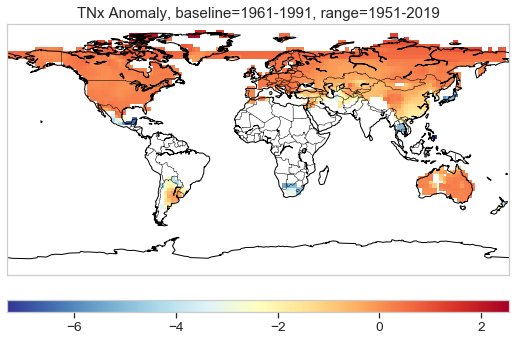

In [239]:
fig = plt.figure(figsize=(9, 6))

lats = ds['lat']
lons = ds['lon']

lons = np.arange(-180, 180, 2.5)

grid_res = 50

# shift grid 
shifted_data = np.roll(anomaly, 72, axis=1)
shifted_lon = np.roll(lons, 72)

parallels = np.arange(min(lats), max(lats)+1, grid_res)
meridians = np.arange(min(lons), max(lons)+1, grid_res)
color_res = 10     # default 20
# map.drawparallels(parallels, labels=[1,0,0,0], color="#62757f", linewidth=0.5)
# map.drawmeridians(meridians, labels=[1,0,0,1], color="#62757f", linewidth=0.5)
map.drawcountries()
map.drawcoastlines()

x, y = map(*np.meshgrid(shifted_lon, lats))
color = map.pcolor(x, y, anomaly.squeeze(), cmap='RdYlBu_r')
map.colorbar(color, location='bottom', pad="10%")
plt.title('TNx Anomaly, baseline=1961-1991, range=1951-2019')
plt.savefig('anomaly_plot.png', dpi=150)

# Data ใน NC files ถูกเรียงมาแบบ -180 .. 180 อยู่แล้ว แต่ lons เป็น 0 .. 360